In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
import random
import seaborn as sns

Using TensorFlow backend.


In [2]:
(xtr,ytr),(xts,yts) = mnist.load_data()

y_true = yts

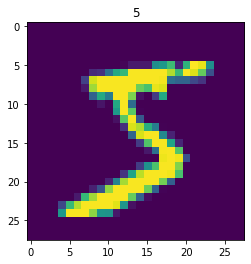

In [3]:
plt.imshow(xtr[0])
plt.title(ytr[0])
plt.show()

In [4]:
print('xtr shape',xtr.shape,sep=':')
print('ytr shape',ytr.shape,sep=':')


xtr shape:(60000, 28, 28)
ytr shape:(60000,)


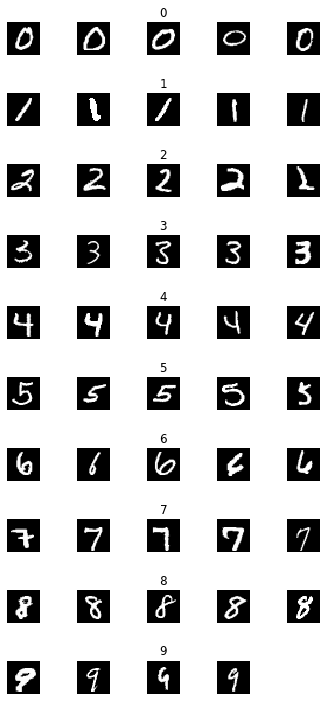

In [5]:
n_cols = 5
n_classes = 10

fig,axes = plt.subplots(nrows=n_classes,ncols=n_cols,figsize=(5,10))
fig.tight_layout()
for i in range(n_cols):
    for j in range(n_classes):
        images = xtr[ytr==j]
        selected_image = images[random.randint(0,(len(images)-1)),:,:]
        axes[j][i].imshow(selected_image,cmap='gray')
        axes[j][i].axis('off')
        if i ==2:
            axes[j][i].set_title(str(j))

sns.countplot(ytr)
plt.show()


# Pre-processing

In [6]:
xtr = xtr.reshape(xtr.shape[0],28,28,1)    #(no. of images, height, width,channels)
xtr = xtr/255

xts = xts.reshape(xts.shape[0],28,28,1)
xts = xts/255

# OneHotEncoding ytr array

In [7]:
from keras.utils.np_utils import to_categorical
ytr = to_categorical(ytr,10) #10 represents number of classes/categories
yts = to_categorical(yts,10)

In [8]:
ytr.shape[1]

10

# Image Agumentation

In [9]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1,zoom_range=0.1, rotation_range=10)

# Creating Neural Net Model

In [10]:
from keras.models import Sequential
from keras.layers import Dense , Flatten , Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam , RMSprop

def create_model():
    model = Sequential()
    model.add(Conv2D(32,kernel_size=(5,5),input_shape = (28,28,1),
                     activation='relu'))
    model.add(Conv2D(32,(5,5),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    
    model.add(Dropout(0.25))
    
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(Conv2D(64,(3,3),activation='relu'))
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(128,activation='relu'))
    model.add(Dense(256,activation='relu'))
    model.add(Dense(10,activation='softmax'))
    model.compile(Adam(lr=0.001),loss='categorical_crossentropy',
                 metrics=['accuracy'])
    
    return model

model = create_model()
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        832       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 20, 20, 32)        25632     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 10, 10, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 10, 10, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 6, 6, 64)          36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 3, 3, 64)         

In [11]:
h = model.fit(xtr, ytr, epochs=10, verbose=1, validation_data=(xts,yts))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 268s 4ms/step - loss: 0.1735 - accuracy: 0.9459 - val_loss: 0.0432 - val_accuracy: 0.9853
Epoch 2/10
60000/60000 [==============================] - 267s 4ms/step - loss: 0.0614 - accuracy: 0.9812 - val_loss: 0.0451 - val_accuracy: 0.9864
Epoch 3/10
60000/60000 [==============================] - 192s 3ms/step - loss: 0.0493 - accuracy: 0.9853 - val_loss: 0.0311 - val_accuracy: 0.9905
Epoch 4/10
60000/60000 [==============================] - 155s 3ms/step - loss: 0.0421 - accuracy: 0.9880 - val_loss: 0.0389 - val_accuracy: 0.9879
Epoch 5/10
60000/60000 [==============================] - 153s 3ms/step - loss: 0.0359 - accuracy: 0.9895 - val_loss: 0.0396 - val_accuracy: 0.9888
Epoch 6/10
60000/60000 [==============================] - 165s 3ms/step - loss: 0.0326 - accuracy: 0.9904 - val_loss: 0.0443 - val_accuracy: 0.9879
Epoch 7/10
60000/60000 [==============================] - 225s

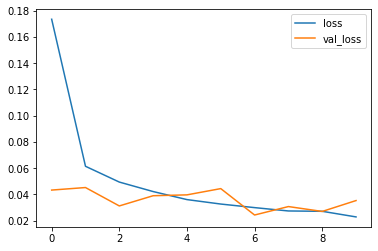

In [12]:
plt.plot(h.history['loss'],label='loss')
plt.plot(h.history['val_loss'],label='val_loss')
plt.legend()
plt.show()


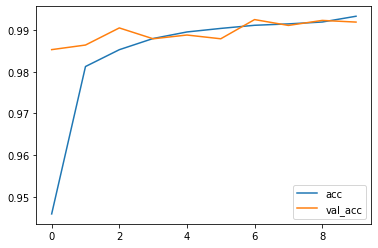

In [13]:
plt.plot(h.history['accuracy'],label='acc')
plt.plot(h.history['val_accuracy'],label='val_acc')
plt.legend()
plt.show()

In [14]:
model.save('model_mnist.h5')
from google.colab import files
files.download('model_mnist.h5')

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
import cv2

In [ ]:
img = cv2.imread(r"C:\Users\mukes\Desktop\Datasets\digit.png")

In [ ]:
img.shape

In [ ]:
img = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
img = cv2.resize(img,(28,28))
#img = cv2.bitwise_not(img) #only required when image is in white background
plt.imshow(img,cmap='gray')
plt.show()

In [ ]:
img = img.reshape(1,28,28,1)
img = img/255

In [ ]:
model.predict_classes(img)

In [ ]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict_classes(xts)

In [ ]:
print(confusion_matrix(y_true,y_pred))